I have created this dataset image that composed by mobile phones camera that produces from a 12 MP, f/2.4, 52mm (telephoto), 1/3.6", 1.0µm, PDAF, OIS.  Running experiments with mediapipe how it reacts with pixel bightness with the fraction of light.  

In [22]:
! pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
from google.colab import files
uploaded = files.upload()

Saving 05.jpg to 05.jpg


05.jpg


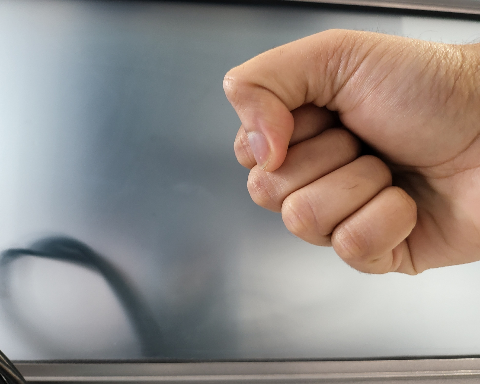

In [57]:
import cv2
from google.colab.patches import cv2_imshow
import math
import numpy as np

DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480
def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)

# Read images with OpenCV.
images = {name: cv2.imread(name) for name in uploaded.keys()}
# Preview the images.
for name, image in images.items():
  print(name)   
  resize_and_show(image)

All MediaPipe Solutions Python 
The image are in `static_image` that does not detect the hand compare when it is live feed-forwarding the image will be recoginsed by the library. 

In [59]:
# Run MediaPipe Hands.
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.7) as hands:
  for name, image in images.items():
    # Convert the BGR image to RGB, flip the image around y-axis for correct 
    # handedness output and process it with MediaPipe Hands.
    results = hands.process(cv2.flip(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 1))

    # Print handedness (left v.s. right hand).
    print(f'Handedness of {name}:')
    print(results.multi_handedness)

    if not results.multi_hand_landmarks:
      continue
    # Draw hand landmarks of each hand.
    print(f'Hand landmarks of {name}:')
    image_hight, image_width, _ = image.shape
    annotated_image = cv2.flip(image.copy(), 1)
    for hand_landmarks in results.multi_hand_landmarks:
      # Print index finger tip coordinates.
      print(
          f'Index finger tip coordinate: (',
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_hight})'
      )
      mp_drawing.draw_landmarks(
          annotated_image,
          hand_landmarks,
          mp_hands.HAND_CONNECTIONS,
          mp_drawing_styles.get_default_hand_landmarks_style(),
          mp_drawing_styles.get_default_hand_connections_style())
    resize_and_show(cv2.flip(annotated_image, 1))

Handedness of 05.jpg:
None


This does not the recognition hand to give an output of result.  

Lugaresi, C., Tang, J., Nash, H., McClanahan, C., Uboweja, E., Hays, M., Zhang, F., Chang, C.L., Yong, M., Lee, J. and Chang, W.T., 2019, June. Mediapipe: A framework for perceiving and processing reality. In Third Workshop on Computer Vision for AR/VR at IEEE Computer Vision and Pattern Recognition (CVPR) (Vol. 2019).